In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
# read the test and train data files
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

Label 3

In [3]:
train_3_df = train_df.iloc[:, :-1]
valid_3_df = valid_df.iloc[:, :-1]
test_3_df = test_df.iloc[:, 1:]

train_3_df.drop(columns=["label_1", "label_2"], inplace=True)
valid_3_df.drop(columns=["label_1", "label_2"], inplace=True)

In [5]:
train_3_df.isna().sum()

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_765    0
feature_766    0
feature_767    0
feature_768    0
label_3        0
Length: 769, dtype: int64

In [6]:
valid_3_df.isna().sum()

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_765    0
feature_766    0
feature_767    0
feature_768    0
label_3        0
Length: 769, dtype: int64

In [4]:
# splitting the test and train datasets into X and Y values
X_3_train= train_3_df.iloc[:,0:-1].values
Y_3_train = train_3_df.iloc[:,-1].values
X_3_valid = valid_3_df.iloc[:,0:-1].values
Y_3_valid = valid_3_df.iloc[:,-1].values
X_3_test = test_3_df.iloc[:,:].values

In [5]:
# scalling and fitting data
scaler = StandardScaler()
scaler.fit(X_3_train)

X_3_train = scaler.transform(X_3_train)
X_3_valid = scaler.transform(X_3_valid)
X_3_test = scaler.transform(X_3_test)

In [10]:
# compare models using cross validation
models = [RandomForestClassifier(), SVC(kernel='linear'), KNeighborsClassifier(n_neighbors=5)]

for model in models:
    cv_score = cross_val_score(model, X_3_train, Y_3_train, cv=5)
    mean_accuracy = round((sum(cv_score)/len(cv_score))*100,2)
    print("Mean accuracy % of the model: ", model, mean_accuracy)

Mean accuracy % of the model:  RandomForestClassifier() 89.99
Mean accuracy % of the model:  SVC(kernel='linear') 98.37
Mean accuracy % of the model:  KNeighborsClassifier() 89.88


In [6]:
# Use SVC since it has the highest accuracy
model = SVC(kernel='linear')
model.fit(X_3_train, Y_3_train)

SVC(kernel='linear')

In [7]:
y_3_valid_pred = model.predict(X_3_valid)
y_3_test_pred = model.predict(X_3_test)
print(classification_report(Y_3_valid, y_3_valid_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       142
           1       1.00      1.00      1.00       608

    accuracy                           1.00       750
   macro avg       0.99      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



<Axes: title={'center': 'Imbalanced data'}, xlabel='label_3'>

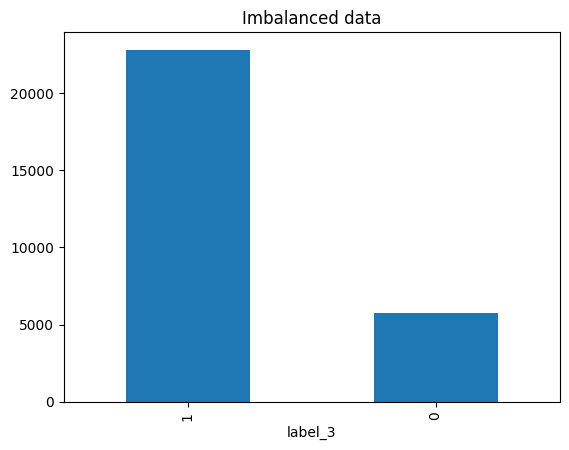

In [8]:
train_3_df['label_3'].value_counts().plot(kind='bar',title='Imbalanced data')

In [9]:
!pip install -U imbalanced-learn

In [10]:
from imblearn.combine import SMOTETomek

In [11]:
# resampling the data

resampler = SMOTETomek(random_state=0)
X_3_train, Y_3_train = resampler.fit_resample(X_3_train, Y_3_train)

In [12]:
# Create a SelectKBest instance with f_classif scoring function and select top 2 features
k = 500
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the data
X_3_train = selector.fit_transform(X_3_train, Y_3_train)
X_3_valid = selector.transform(X_3_valid)
X_3_test = selector.transform(X_3_test)

In [13]:
X_3_train.shape

(45592, 500)

In [14]:
model.fit(X_3_train, Y_3_train)
y_3_pred_after = model.predict(X_3_valid)
print(classification_report(Y_3_valid, y_3_pred_after))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       1.00      1.00      1.00       608

    accuracy                           1.00       750
   macro avg       0.99      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



In [15]:
pca=PCA(0.85)
pca = pca.fit(X_3_train)

x_3_train_pca=pca.fit_transform(X_3_train)
x_3_valid_pca = pca.transform(X_3_valid)
x_3_test_pca = pca.transform(X_3_test)

In [16]:
# Use SVC
model.fit(x_3_train_pca, Y_3_train)

y_3_pred_after = model.predict(x_3_valid_pca)
print(classification_report(Y_3_valid, y_3_pred_after))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       142
           1       0.99      0.99      0.99       608

    accuracy                           0.99       750
   macro avg       0.97      0.98      0.98       750
weighted avg       0.99      0.99      0.99       750



In [17]:
x_3_train_pca.shape

(45592, 92)

In [18]:
# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf' kernel
}

In [19]:
# Create a GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [20]:
# Fit the GridSearchCV instance to the training data
grid_search.fit(x_3_train_pca, Y_3_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [21]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [22]:
# Evaluate the best model on the test set
y_3_pred_after = best_model.predict(x_3_valid_pca)
preds = best_model.predict(x_3_test_pca)

print("Best Hyperparameters:", best_params)
print(classification_report(Y_3_valid, y_3_pred_after))

Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.99      1.00      1.00       608

    accuracy                           0.99       750
   macro avg       1.00      0.98      0.99       750
weighted avg       0.99      0.99      0.99       750



In [23]:
data_frame = pd.DataFrame(preds, columns=["label_3"])
data_frame.to_csv(f"190253K_3.csv",na_rep='')